In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
import warnings

%matplotlib inline

In [3]:
warnings.filterwarnings("ignore")

train = pd.read_csv("Train_Data.csv")
test = pd.read_csv("Test_Data.csv")

train_original = train.copy()
test_original = train.copy()

In [4]:
#changing date datatype
train['Datetime'] = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')

train_original['Datetime'] = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')

In [5]:
#extracting month, year, day, hour data
for i in (train, test, train_original, test_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['Hour'] = i.Datetime.dt.hour

train['dayofweek'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [ ]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

temp2 = train['Datetime'].apply(applyer)

train['weekend'] = temp2

train.index = train['Datetime'] #for x axis
df = train.drop("ID", 1) #drop ID variable to get only the date time on x axis

ts = df['Count']

plt.figure(figsize = (16,8))
plt.plot(ts, label = "Passenger Count")
plt.title("Time Series")
plt.xlabel("Time(Year-Month)")
plt.ylabel("Passenger Count")
plt.legend(loc="best")

<AxesSubplot:xlabel='month'>

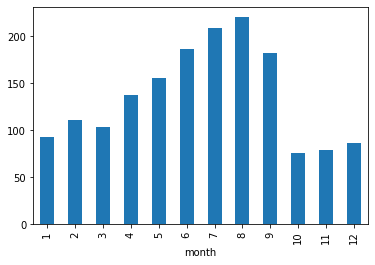

In [6]:
train.groupby('month')['Count'].mean().plot.bar()

<AxesSubplot:title={'center':'Passenger count(Monthwise)'}, xlabel='year,month'>

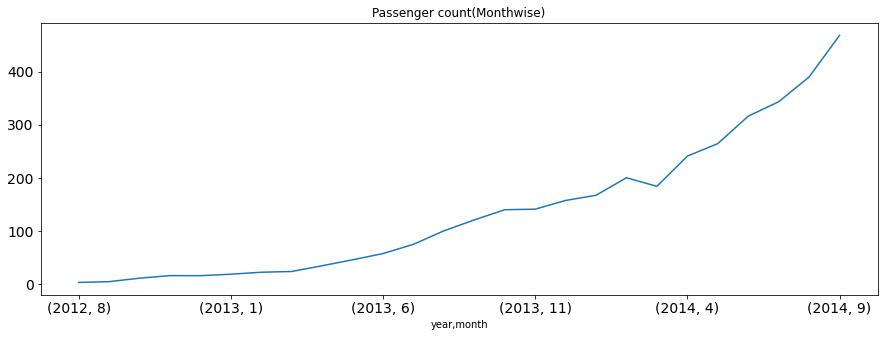

In [15]:
temp = train.groupby(['year','month'])['Count'].mean()
temp.plot(figsize = (15,5), title = "Passenger count(Monthwise)", fontsize=14)

<AxesSubplot:xlabel='day'>

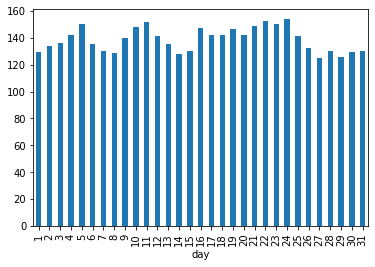

In [7]:
train.groupby('day')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='Hour'>

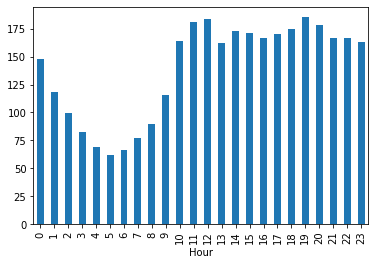

In [17]:
train.groupby('Hour')['Count'].mean().plot.bar()

In [8]:
train.head(10)

,ID,Datetime,Count,year,month,day,Hour,dayofweek
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5
5,5,2012-08-25 05:00:00,2,2012,8,25,5,5
6,6,2012-08-25 06:00:00,2,2012,8,25,6,5
7,7,2012-08-25 07:00:00,2,2012,8,25,7,5
8,8,2012-08-25 08:00:00,6,2012,8,25,8,5
9,9,2012-08-25 09:00:00,2,2012,8,25,9,5


In [9]:
train.groupby("weekend")['Count'].mean().plot.bar()

KeyError: 'weekend'

<AxesSubplot:xlabel='dayofweek'>

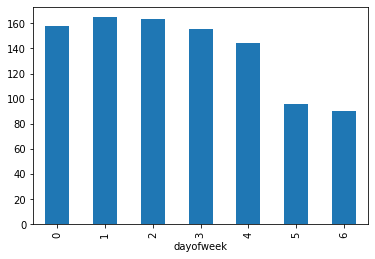

In [25]:
train.groupby("dayofweek")["Count"].mean().plot.bar()

<AxesSubplot:title={'center':'Monthly'}, xlabel='Datetime'>

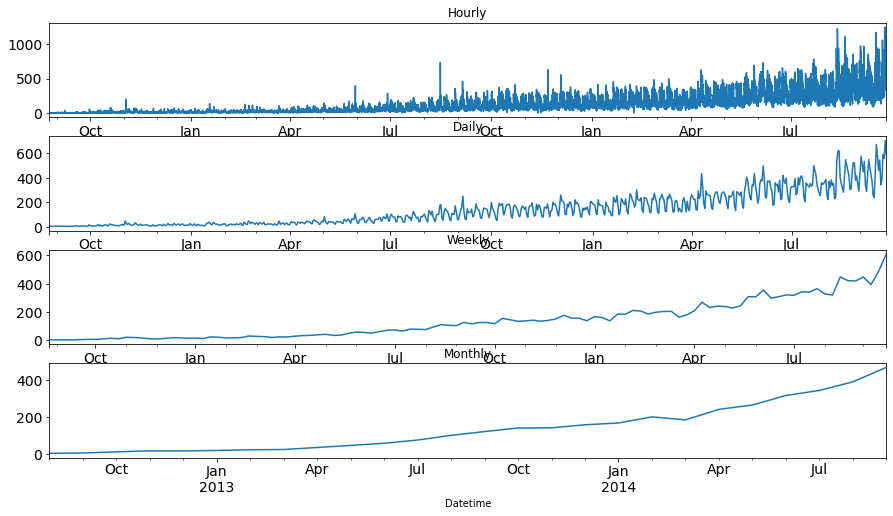

In [21]:
train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.Timestamp

#droping id
# train = train.drop('ID',1)
train.index = train.Timestamp

#hourly time series
hourly = train.resample('H').mean()
#converting daily mean
daily = train.resample('D').mean()
#converting weekly mean
weekly = train.resample('W').mean()
#converting to monthly mean
monthly = train.resample('M').mean()

monthly.head(10)

fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8), title="Hourly", fontsize=14, ax = axs[0])
daily.Count.plot(figsize=(15,8), title="Daily", fontsize=14, ax = axs[1])
weekly.Count.plot(figsize=(15,8), title="Weekly", fontsize=14, ax = axs[2])
monthly.Count.plot(figsize=(15,8), title="Monthly", fontsize=14, ax = axs[3])   




In [26]:
test.Timestamp = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index = test.Timestamp

#converting daily mean
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.Timestamp

#converting daily mean
train = train.resample('D').mean()


AttributeError: 'DataFrame' object has no attribute 'Datetime'

In [44]:

Train = train.loc[(train.index > '24-08-2012') & (train.index <= '24-06-2014')]
valid = train.loc[(train.index > '25-06-2014') & (train.index <= '25-09-2014')]    
